<a href="https://colab.research.google.com/github/blakebollinger/compare-activation-functions/blob/main/Comparison_of_Activation_Functions_for_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison of Activation Functions for Deep Learning


---

For this purpose, a simple convolutional model was used for the CIFAR10 dataset.
 

*   Sigmoid Function
*   ReLU Function
*   Leaky-ReLU Function

The loss, validation, training accuracy for the different activation function and the same dataset and deep learning model are calculated. Comparison with histograms is presented.






### Google Colab Authentication Process

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### You can run this section to see the details of the hardware used!
We will do this work on the GPU (Tesla K80).

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 157136062574715030
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14343274496
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17553605917869108971
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

### The step of libraries and imports.

In [ ]:
!pip install -q keras

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D
from keras import backend as K

import tensorflow  as tf
from keras.layers import *
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt

## Downloading the Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


### Visualization of some sample data
We don't have to do this step. We're thinking about how to resize some of the data.


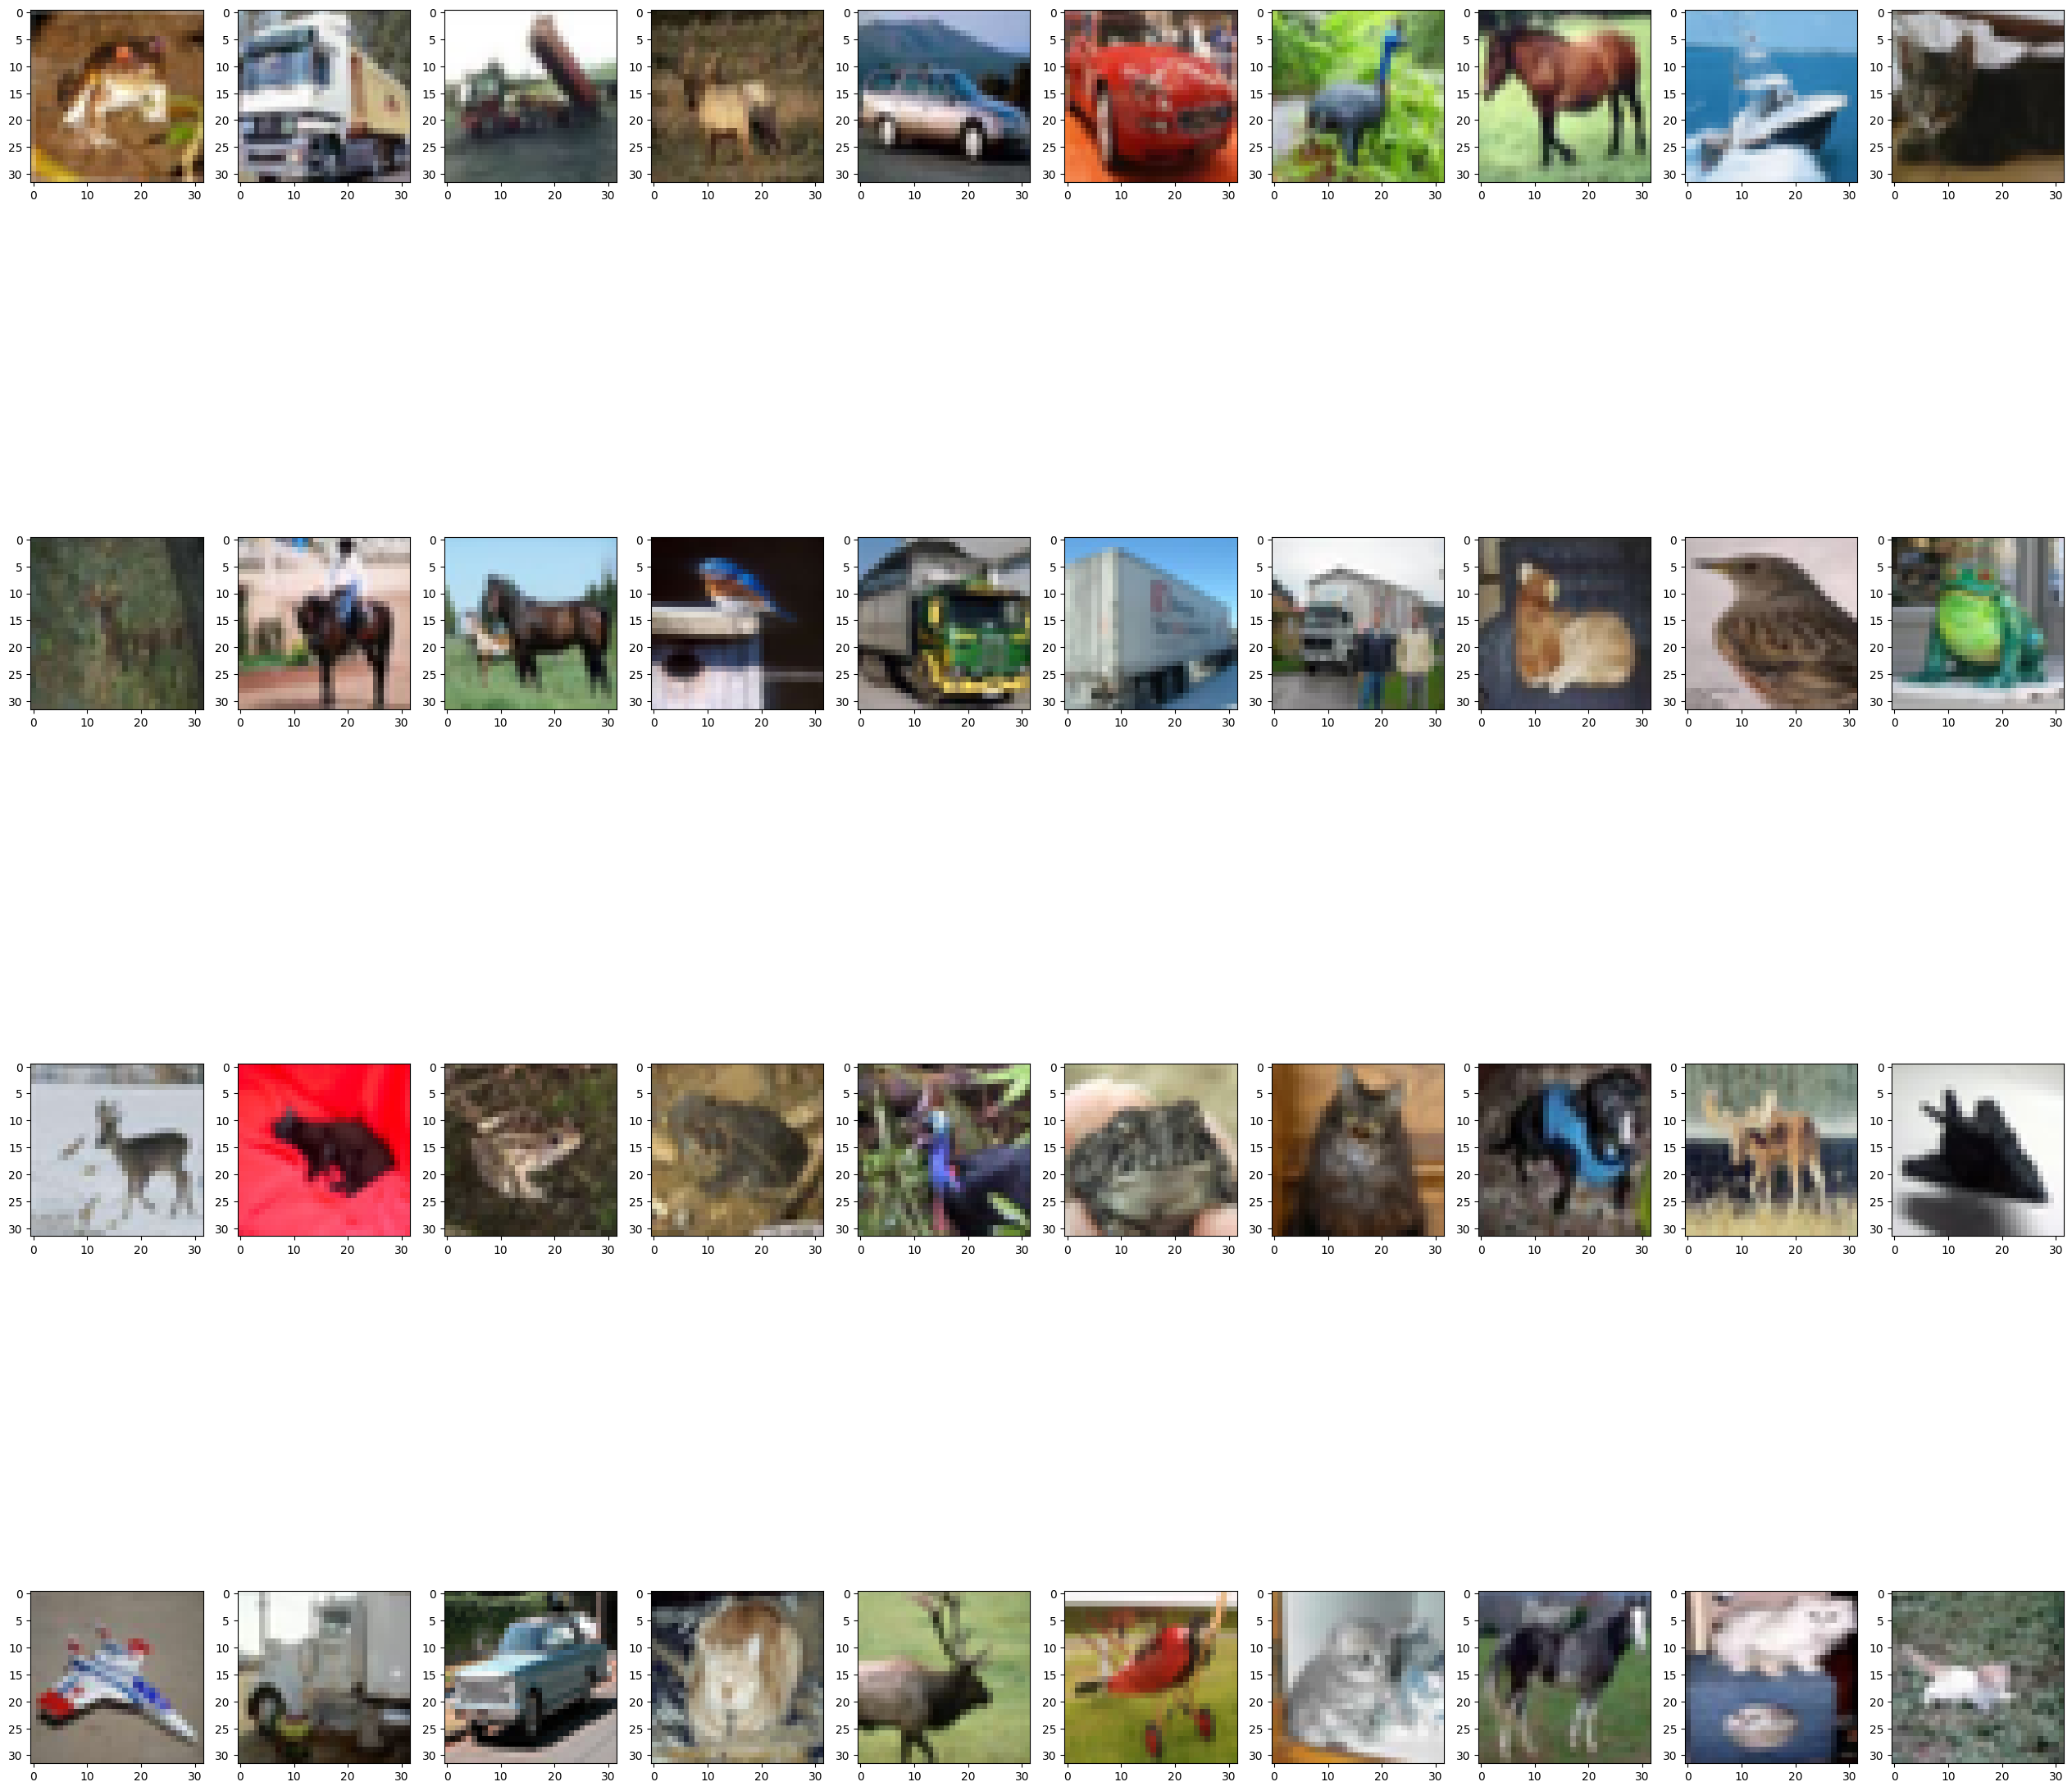

In [ ]:
plt.figure(figsize=(32,32))
x, y = 10, 4 
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i])
plt.show()

### Configuration Settings

In [ ]:
batch_size = 128 # Batch-Size
num_classes = 10 # Number of Class
epochs = 15 # Number of epoch
w_l2 = 1e-5 # Initial

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

In [ ]:
img_rows, img_cols = 32, 32

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors into binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### Sigmoid Function 

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0

### Result of Train and Test 


In [ ]:
hist_sigmoid=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/15
391/391 [==============================] - 19s 19ms/step - loss: 1.7468 - accuracy: 0.3757 - val_loss: 2.1864 - val_accuracy: 0.2560 - lr: 0.0010
Epoch 2/15
391/391 [==============================] - 7s 17ms/step - loss: 1.3952 - accuracy: 0.5101 - val_loss: 1.5775 - val_accuracy: 0.4015 - lr: 0.0010
Epoch 3/15
391/391 [==============================] - 7s 17ms/step - loss: 1.2451 - accuracy: 0.5702 - val_loss: 1.1456 - val_accuracy: 0.6135 - lr: 0.0010
Epoch 4/15
391/391 [==============================] - 7s 17ms/step - loss: 1.1610 - accuracy: 0.6007 - val_loss: 1.3178 - val_accuracy: 0.5304 - lr: 0.0010
Epoch 5/15
391/391 [==============================] - 7s 17ms/step - loss: 1.1007 - accuracy: 0.6236 - val_loss: 1.2399 - val_accuracy: 0.5801 - lr: 0.0010
Epoch 6/15
391/391 [==============================] - 7s 17ms/step - loss: 1.0504 - accuracy: 0.6449 - val_loss: 1.0172 - val_accuracy: 0.6523 - lr: 0.0010
Epoch 7/15
391/391 [==============================] - 7s 18ms/s

### ReLU Function

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_3 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 28, 28, 64)       

### Result of Train and Test


In [ ]:
hist_relu=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/15
391/391 [==============================] - 8s 18ms/step - loss: 1.4315 - accuracy: 0.5004 - val_loss: 1.9218 - val_accuracy: 0.2787 - lr: 0.0010
Epoch 2/15
391/391 [==============================] - 7s 17ms/step - loss: 1.0592 - accuracy: 0.6283 - val_loss: 1.2214 - val_accuracy: 0.5799 - lr: 0.0010
Epoch 3/15
391/391 [==============================] - 7s 17ms/step - loss: 0.9450 - accuracy: 0.6712 - val_loss: 1.0123 - val_accuracy: 0.6547 - lr: 0.0010
Epoch 4/15
391/391 [==============================] - 7s 17ms/step - loss: 0.8671 - accuracy: 0.7022 - val_loss: 0.9167 - val_accuracy: 0.6861 - lr: 0.0010
Epoch 5/15
391/391 [==============================] - 7s 17ms/step - loss: 0.8062 - accuracy: 0.7230 - val_loss: 1.0163 - val_accuracy: 0.6647 - lr: 0.0010
Epoch 6/15
391/391 [==============================] - 7s 18ms/step - loss: 0.7537 - accuracy: 0.7426 - val_loss: 0.9729 - val_accuracy: 0.6773 - lr: 0.0010
Epoch 7/15
391/391 [==============================] - 6s 16ms/st

### Leaky-ReLU Function

In [ ]:
from keras.layers import LeakyReLU

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=.1))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=.1))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 30, 30, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 28, 28, 64)       

### Result of Train and Test


In [ ]:
hist_LeakyReLU=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/15
391/391 [==============================] - 9s 20ms/step - loss: 1.4276 - accuracy: 0.5016 - val_loss: 1.7344 - val_accuracy: 0.4012 - lr: 0.0010
Epoch 2/15
391/391 [==============================] - 8s 20ms/step - loss: 1.0761 - accuracy: 0.6248 - val_loss: 1.0611 - val_accuracy: 0.6382 - lr: 0.0010
Epoch 3/15
391/391 [==============================] - 7s 19ms/step - loss: 0.9709 - accuracy: 0.6649 - val_loss: 0.9927 - val_accuracy: 0.6519 - lr: 0.0010
Epoch 4/15
391/391 [==============================] - 8s 20ms/step - loss: 0.8995 - accuracy: 0.6880 - val_loss: 0.9682 - val_accuracy: 0.6623 - lr: 0.0010
Epoch 5/15
391/391 [==============================] - 8s 19ms/step - loss: 0.8407 - accuracy: 0.7112 - val_loss: 0.9361 - val_accuracy: 0.6852 - lr: 0.0010
Epoch 6/15
391/391 [==============================] - 8s 19ms/step - loss: 0.7945 - accuracy: 0.7282 - val_loss: 1.0436 - val_accuracy: 0.6514 - lr: 0.0010
Epoch 7/15
391/391 [==============================] - 8s 20ms/st

## Defining the plot function

In [ ]:
def plot_history(hists, attribute='val_loss', axis=(-1,21,0.85,0.94), loc='lower right'):
    ylabel = {'oss': 'loss', 'acy': 'accuracy'}
    title = {'val_loss': 'Validation Set Loss', 'loss': 'Training Set Loss', 'val_accuracy': 'Validation Set Accuracy', 'accuracy': 'Training Set Accuracy'}
    num_hists = len(hists)
    
    plt.figure(figsize=(12, 8))  
    plt.axis(axis)
    for i in range(num_hists):
        plt.plot(hists[i].history[attribute])
    plt.title(title[attribute])  
    plt.ylabel(ylabel[attribute[-3:]])  
    plt.xlabel('epoch')  
    plt.legend(['Sigmoid', 'ReLU', 'Leaky_ReLU'], loc=loc)  

    plt.show()

In [ ]:
hists = [hist_sigmoid, hist_relu, hist_LeakyReLU]

## Comparison of Results

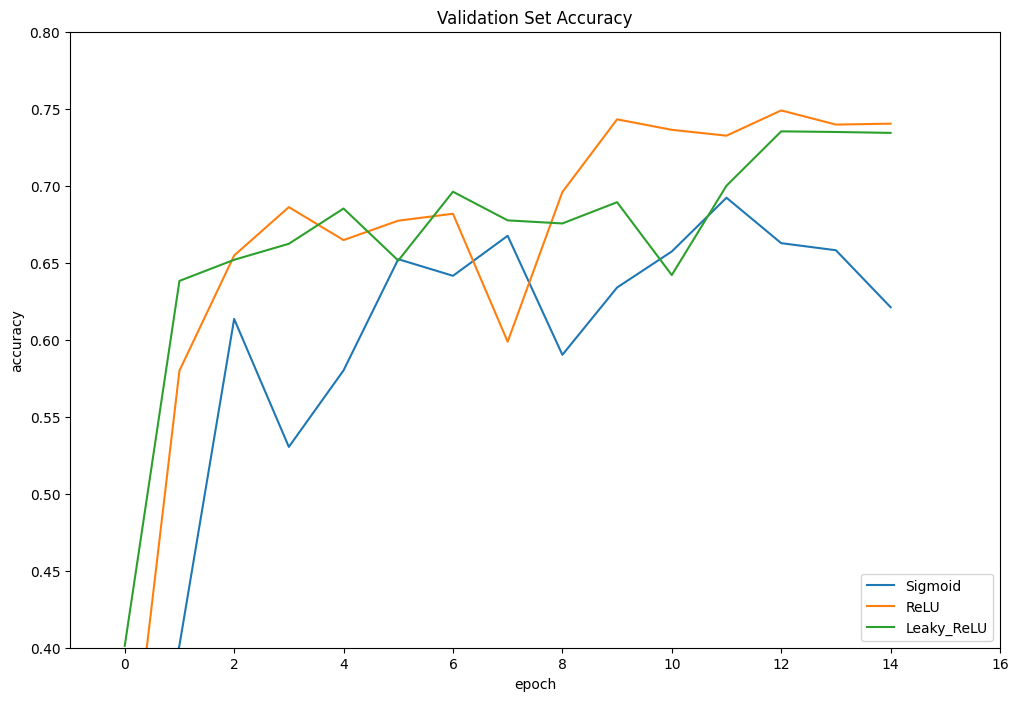

In [ ]:
plot_history(hists, attribute='val_accuracy', axis=(-1,16,0.4,0.8), loc='lower right')

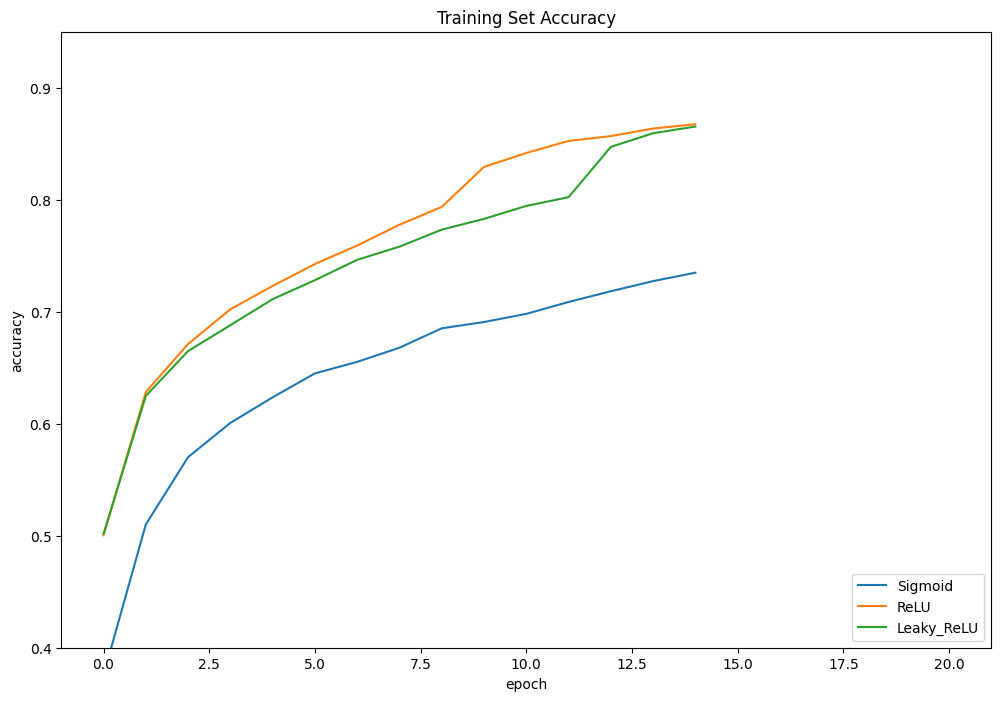

In [ ]:
plot_history(hists, attribute='accuracy', axis=(-1,21,0.4,0.95), loc='lower right')

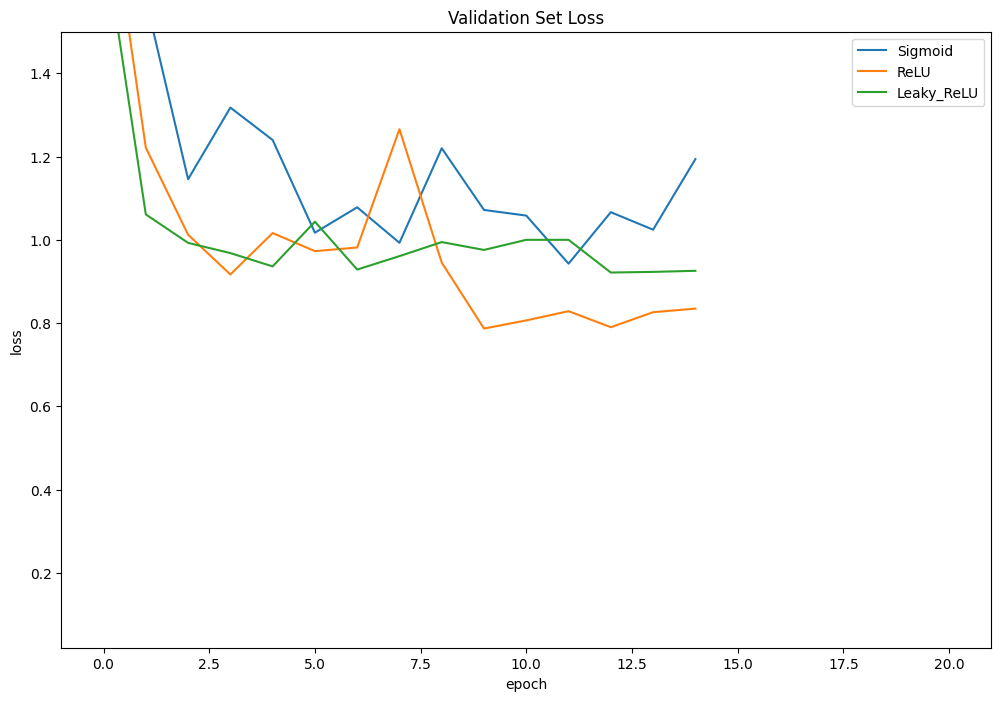

In [ ]:
plot_history(hists, attribute='val_loss', axis=(-1,21,0.02,1.5), loc='upper right')

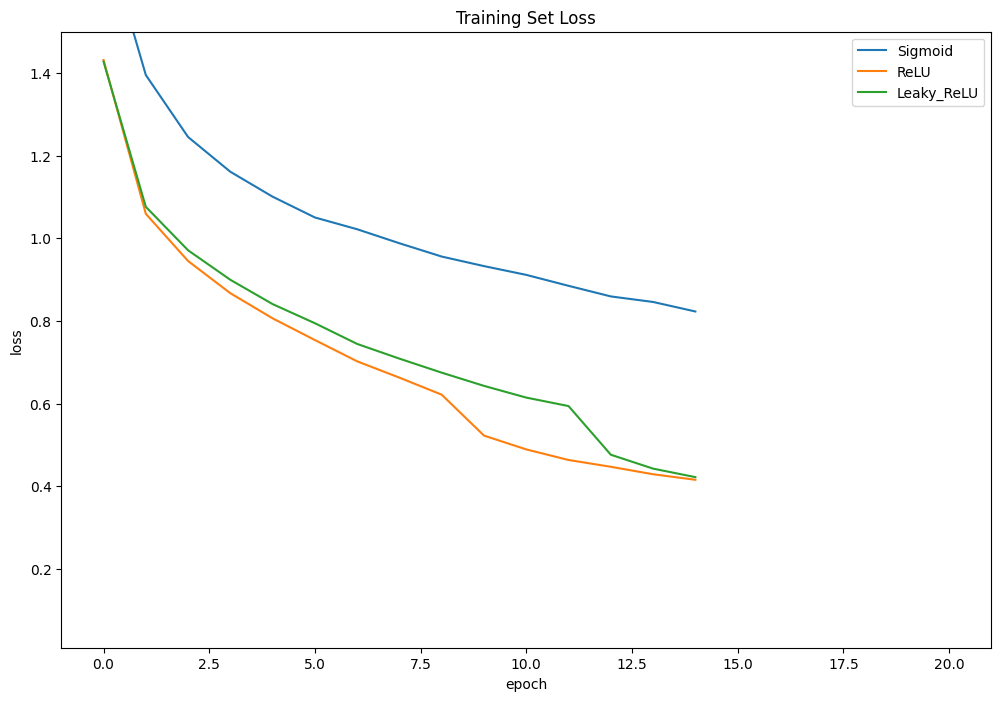

In [ ]:
plot_history(hists, attribute='loss', axis=(-1,21,0.009,1.5), loc='upper right')